terkait dataset https://archive.ics.uci.edu/dataset/73/mushroom

masukkan data bank-full


# Judul: Analisis Penjualan Mobil di Indonesia Menggunakan Data Mining
# Identitas: M. Rifqi Febrian Mohar - A11.202214348

#Ringkasan dan Permasalahan Project + Tujuan yang Akan Dicapai
## Permasalahan:
## - Membantu mengklasifikasikan apakah suatu jamur beracun atau tidak berdasarkan karakteristiknya.
## - Dataset: Mushroom Dataset dari UCI.
## Tujuan:
## - Membangun model pembelajaran mesin (Decision Tree) untuk klasifikasi.
## - Evaluasi performa model berdasarkan akurasi, presisi, dan recall.

# Alur Penyelesaian:
## 1. Memuat dan memahami dataset.
## 2. Melakukan Exploratory Data Analysis (EDA).
## 3. Melakukan preprocessing dataset.
## 4. Membagi dataset menjadi data latih dan uji.
## 5. Melatih model Decision Tree.
## 6. Mengevaluasi performa model.

## Penjelasan Dataset, EDA dan Proses Features Dataset
# 1. Dataset:
# - Dataset memiliki informasi berbagai karakteristik jamur, termasuk fitur seperti warna, bau, dan bentuk.
# - Target: Kolom "poisonous" untuk menentukan apakah jamur beracun atau tidak.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/agaricus-lepiota.data', header=None)
data.columns = ["poisonous","capshape","capsurface","capcolor","bruises","odor","gillattachment","gillspacing","gillsize","gillcolor","stalkshape","stalkroot","stalksurfaceabovering","stalksurfacebelowring","stalkcolorabovering","stalkcolorbelowring","veiltype","veilcolor","ringnumber","ringtype","sporeprintcolor","population","habitat"]

# Menampilkan data awal
data.head()

## Exploratory Data Analysis
# Cek distribusi data
sns.countplot(x="poisonous", data=data)
plt.show()

## Proses Learning / Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Preprocessing
data = pd.get_dummies(data, drop_first=True)
X = data.drop("poisonous_p", axis=1)
y = data["poisonous_p"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

## Performa Model
# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Presisi: {precision}")
print(f"Recall: {recall}")

## Diskusi Hasil dan Kesimpulan
# - Akurasi menunjukkan bahwa model memiliki tingkat prediksi yang baik.
# - Namun, perlu dilakukan validasi lebih lanjut pada data lain untuk memastikan generalisasi model.
# - Kesimpulan: Model Decision Tree efektif untuk tugas klasifikasi ini.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/UTS PEMBELAJARAN MESIN-M. RIFQI FEBRIAN MOHAR - A11.2022.14348')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd # untuk memasukkan dataset ke dataframe
import seaborn as sns # untuk mempercantik visualisasi
import matplotlib.pyplot as plt # untuk menggambar grafik
from sklearn.model_selection import train_test_split # untuk membagi training dan testing
from sklearn.tree import DecisionTreeClassifier # kita pakai decision Tree
import numpy as np # digunakan untuk operasi matematika
from sklearn.pipeline import Pipeline #digunakan untuk mencegah nilai nya bocor
from sklearn.model_selection import GridSearchCV #digunakan untuk mendapatkan parameter optimal
# untuk melihat score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
# settings to display all columns
pd.set_option("display.max_columns", None)

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/agaricus-lepiota.data', sep=',', header=None)

In [ ]:

dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
dataset.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


## masukkan nama kolom ke dataset (jika ada)

In [ ]:
dataset.columns=["poisonous","capshape","capsurface","capcolor","bruises","odor","gillattachment","gillspacing","gillsize","gillcolor","stalkshape","stalkroot",
                 "stalksurfaceabovering","stalksurfacebelowring","stalkcolorabovering","stalkcolorbelowring","veiltype","veilcolor","ringnumber","ringtype","sporeprintcolor","population","habitat"]
#dataset.columns=["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration",
#                 "campaign","pdays","previous","outcome","y"]

In [ ]:
dataset.head()

,poisonous,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurfaceabovering,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   poisonous              8124 non-null   object
 1   capshape               8124 non-null   object
 2   capsurface             8124 non-null   object
 3   capcolor               8124 non-null   object
 4   bruises                8124 non-null   object
 5   odor                   8124 non-null   object
 6   gillattachment         8124 non-null   object
 7   gillspacing            8124 non-null   object
 8   gillsize               8124 non-null   object
 9   gillcolor              8124 non-null   object
 10  stalkshape             8124 non-null   object
 11  stalkroot              8124 non-null   object
 12  stalksurfaceabovering  8124 non-null   object
 13  stalksurfacebelowring  8124 non-null   object
 14  stalkcolorabovering    8124 non-null   object
 15  stalkcolorbelowring  

## cek data kosong

In [ ]:
dataset.replace("?", np.nan, inplace= True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   poisonous              8124 non-null   object
 1   capshape               8124 non-null   object
 2   capsurface             8124 non-null   object
 3   capcolor               8124 non-null   object
 4   bruises                8124 non-null   object
 5   odor                   8124 non-null   object
 6   gillattachment         8124 non-null   object
 7   gillspacing            8124 non-null   object
 8   gillsize               8124 non-null   object
 9   gillcolor              8124 non-null   object
 10  stalkshape             8124 non-null   object
 11  stalkroot              5644 non-null   object
 12  stalksurfaceabovering  8124 non-null   object
 13  stalksurfacebelowring  8124 non-null   object
 14  stalkcolorabovering    8124 non-null   object
 15  stalkcolorbelowring  

In [ ]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

stalkroot    30.526834
dtype: float64

## cek data duplikat

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   poisonous              8124 non-null   object
 1   capshape               8124 non-null   object
 2   capsurface             8124 non-null   object
 3   capcolor               8124 non-null   object
 4   bruises                8124 non-null   object
 5   odor                   8124 non-null   object
 6   gillattachment         8124 non-null   object
 7   gillspacing            8124 non-null   object
 8   gillsize               8124 non-null   object
 9   gillcolor              8124 non-null   object
 10  stalkshape             8124 non-null   object
 11  stalkroot              5644 non-null   object
 12  stalksurfaceabovering  8124 non-null   object
 13  stalksurfacebelowring  8124 non-null   object
 14  stalkcolorabovering    8124 non-null   object
 15  stalkcolorbelowring  

## cek data konstan

In [ ]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   poisonous              8124 non-null   object
 1   capshape               8124 non-null   object
 2   capsurface             8124 non-null   object
 3   capcolor               8124 non-null   object
 4   bruises                8124 non-null   object
 5   odor                   8124 non-null   object
 6   gillattachment         8124 non-null   object
 7   gillspacing            8124 non-null   object
 8   gillsize               8124 non-null   object
 9   gillcolor              8124 non-null   object
 10  stalkshape             8124 non-null   object
 11  stalkroot              5644 non-null   object
 12  stalksurfaceabovering  8124 non-null   object
 13  stalksurfacebelowring  8124 non-null   object
 14  stalkcolorabovering    8124 non-null   object
 15  stalkcolorbelowring  

## visualisasi

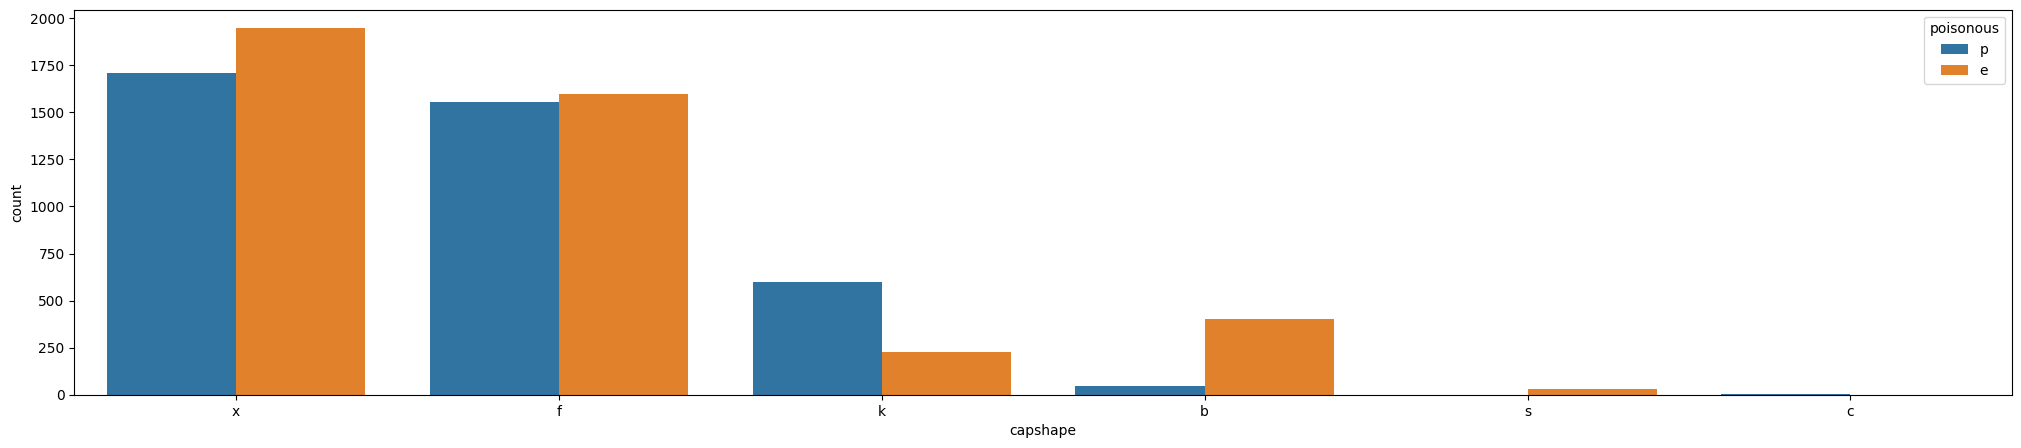

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['capshape'],order=dataset['capshape'].value_counts().index,hue=dataset['poisonous'])
plt.show()

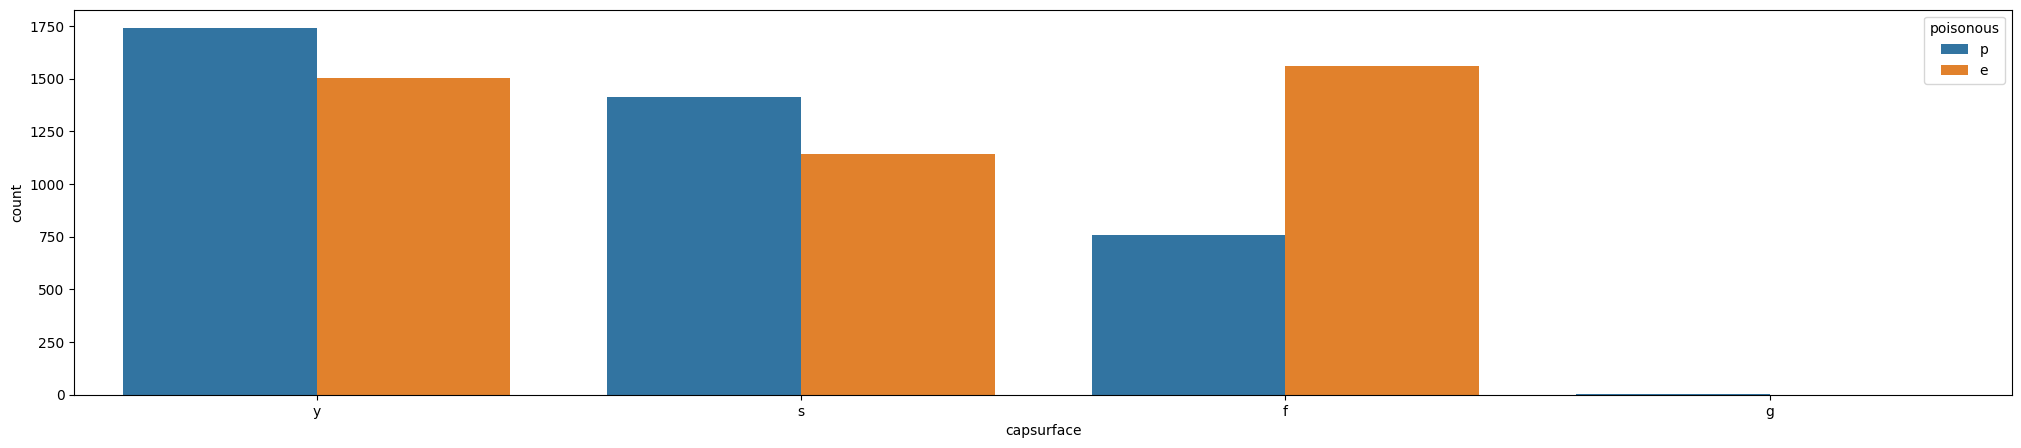

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['capsurface'],order=dataset['capsurface'].value_counts().index,hue=dataset['poisonous'])
plt.show()

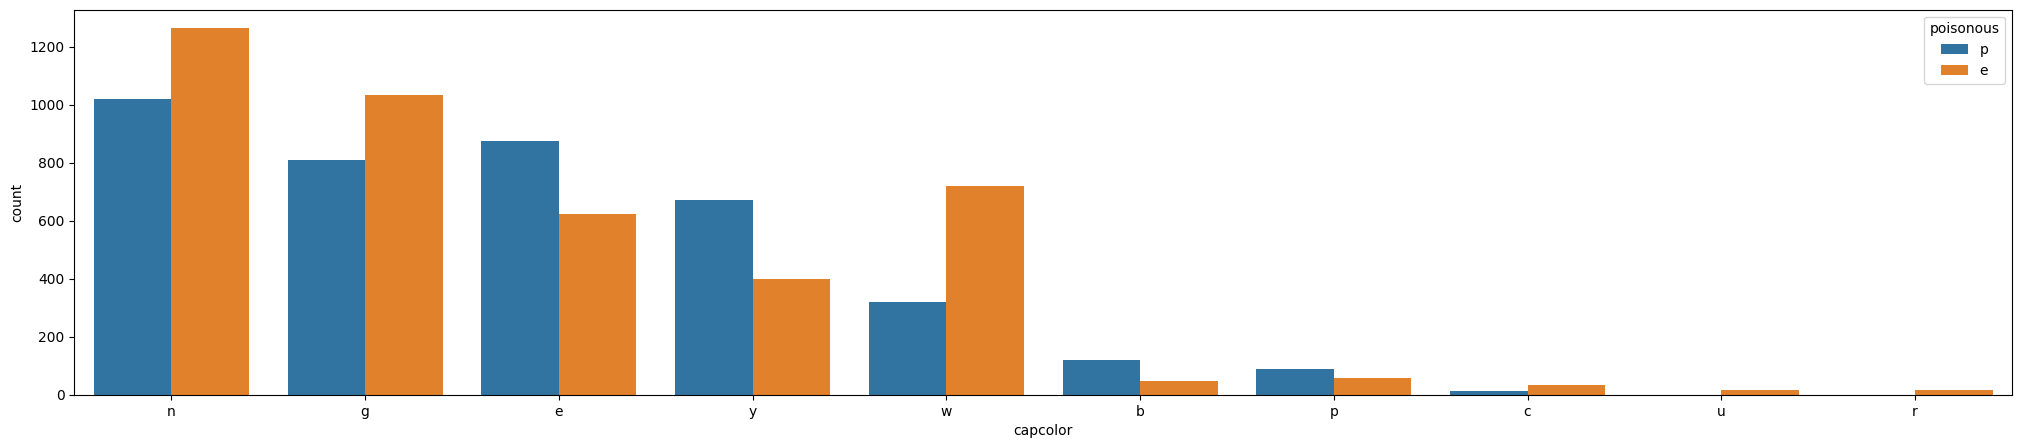

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['capcolor'],order=dataset['capcolor'].value_counts().index,hue=dataset['poisonous'])
plt.show()

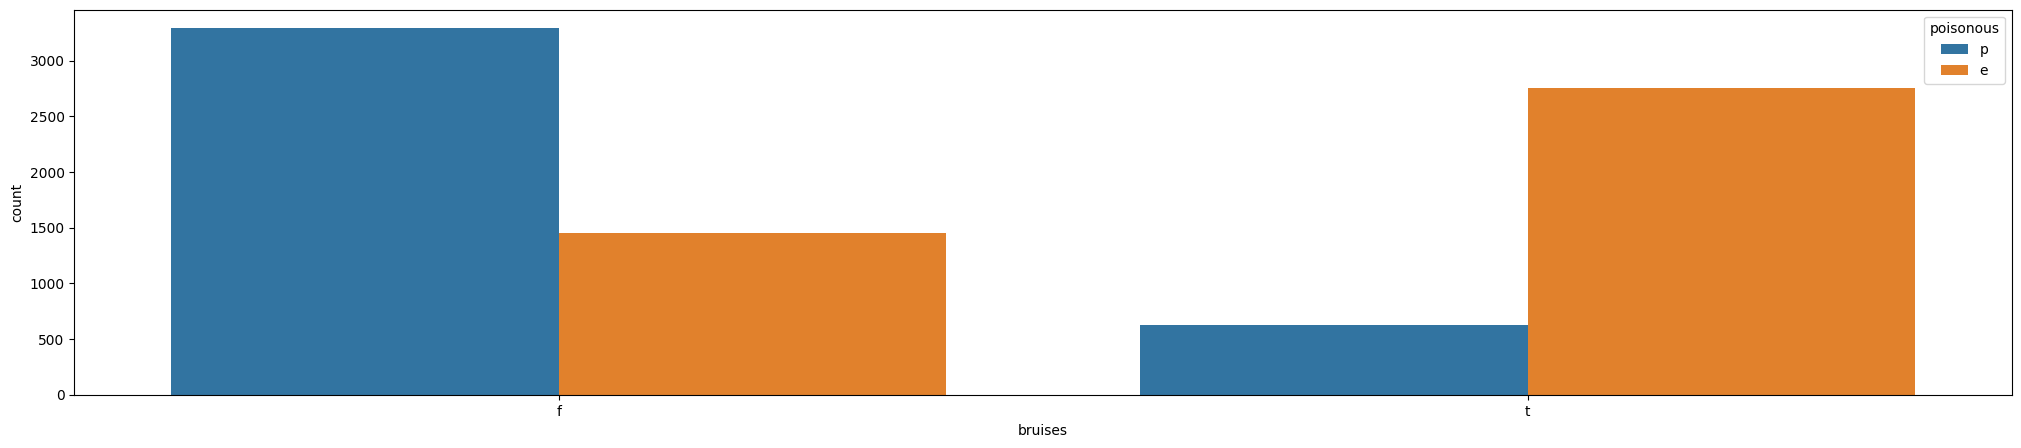

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['bruises'],order=dataset['bruises'].value_counts().index,hue=dataset['poisonous'])
plt.show()

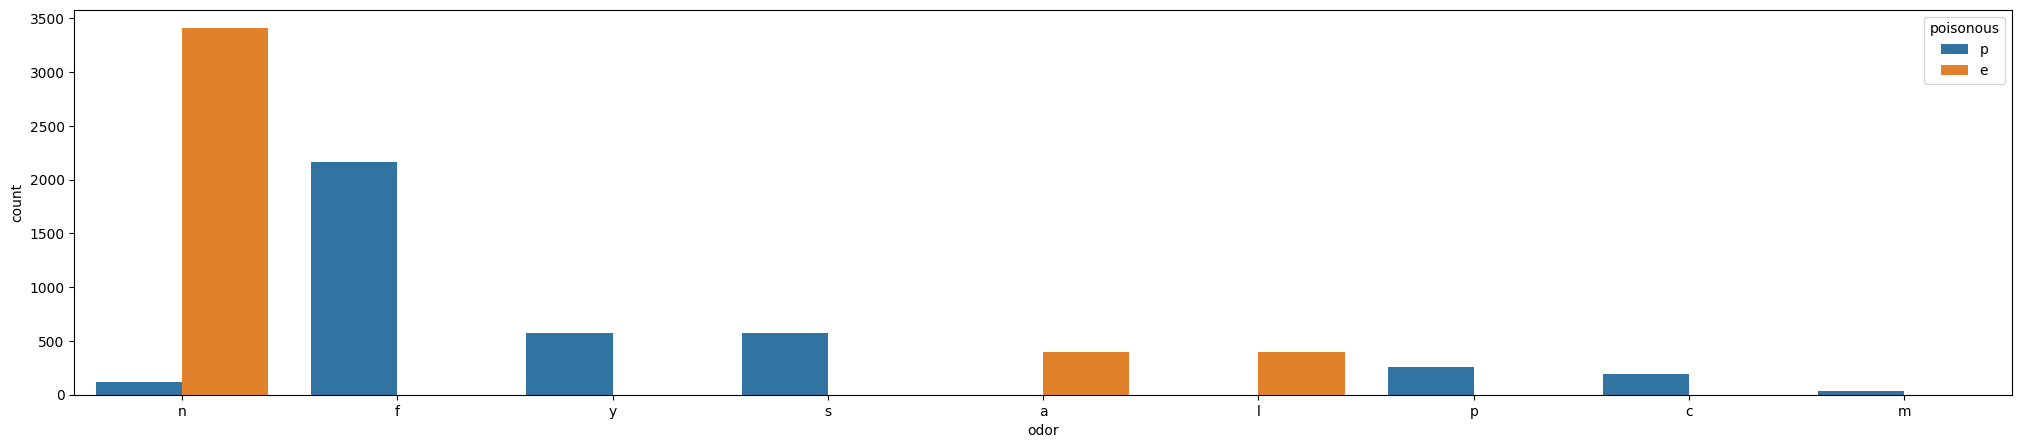

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['odor'],order=dataset['odor'].value_counts().index,hue=dataset['poisonous'])
plt.show()

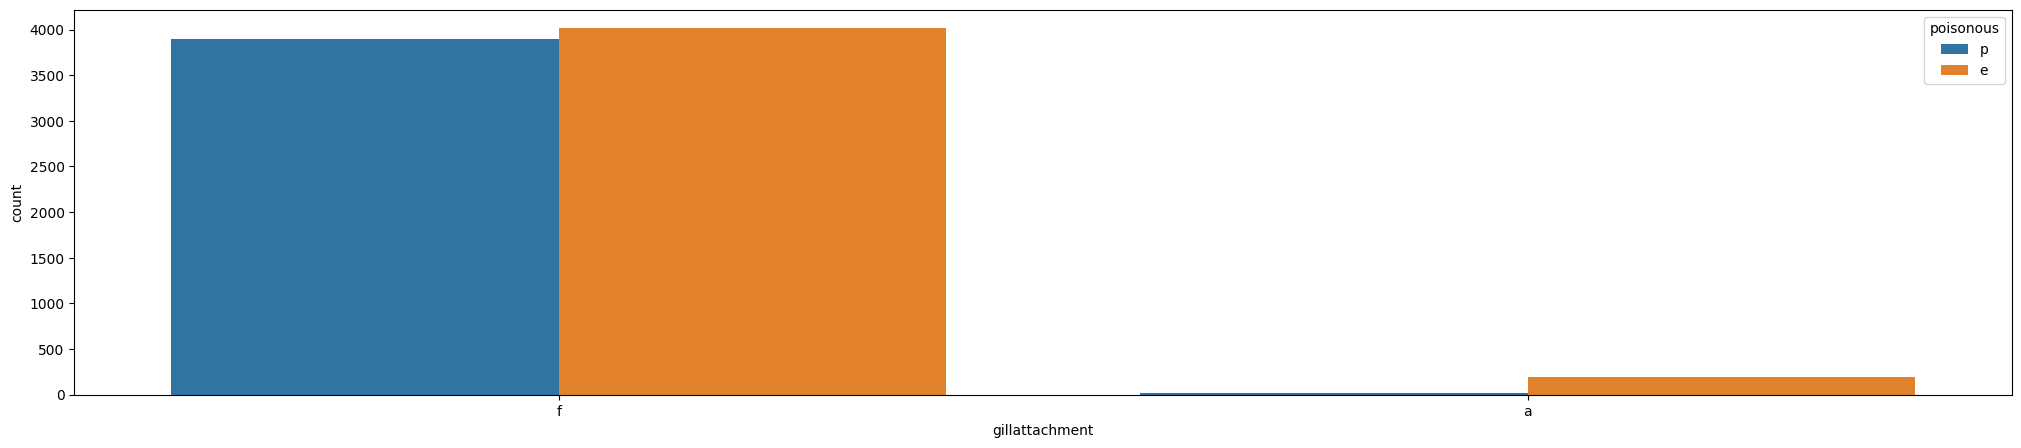

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['gillattachment'],order=dataset['gillattachment'].value_counts().index,hue=dataset['poisonous'])
plt.show()

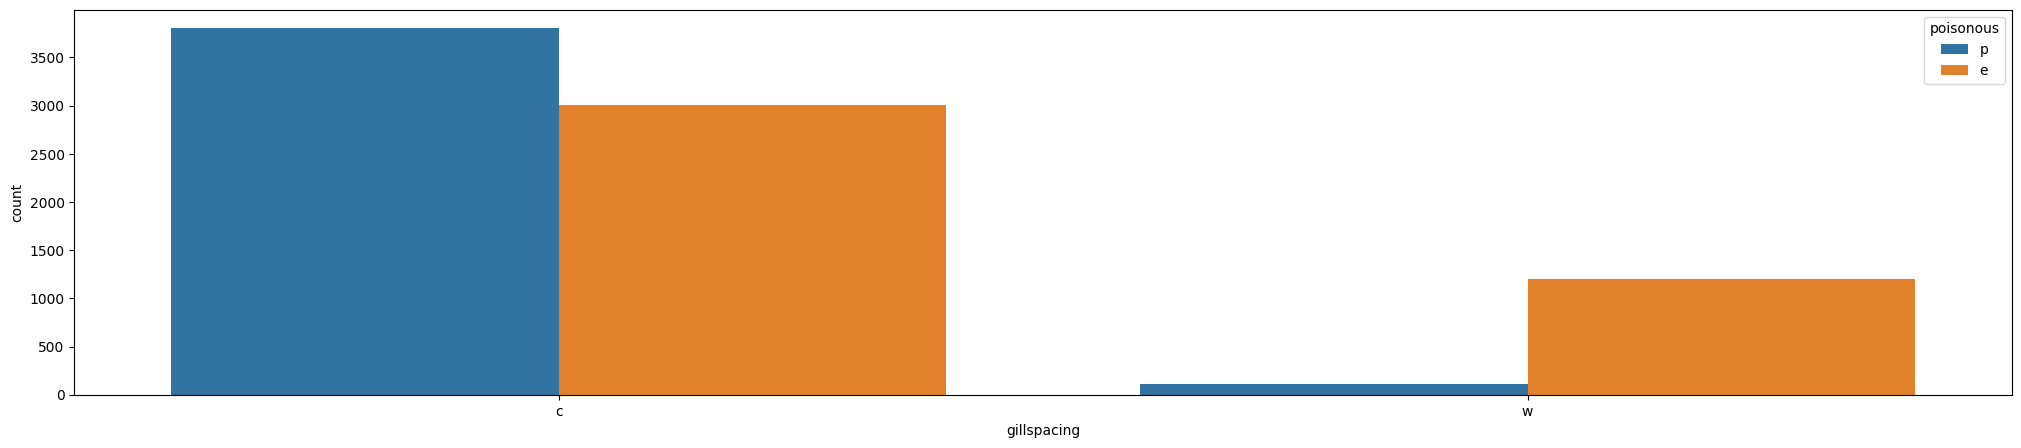

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['gillspacing'],order=dataset['gillspacing'].value_counts().index,hue=dataset['poisonous'])
plt.show()

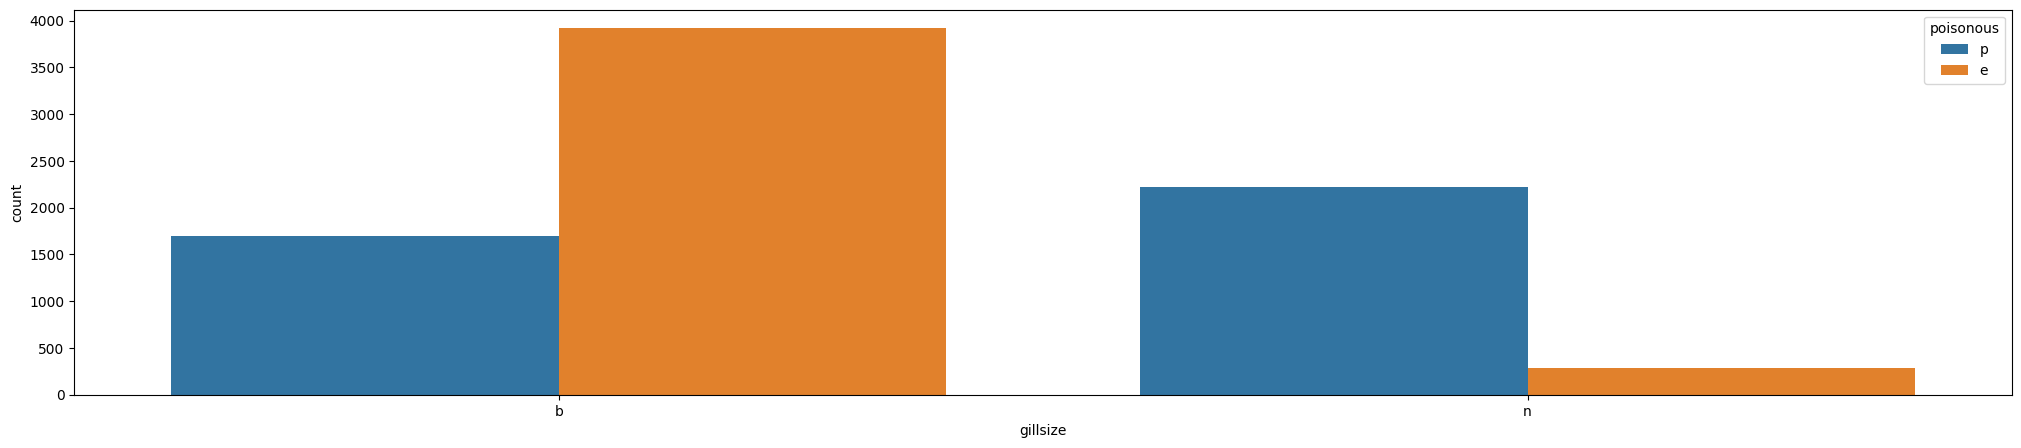

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['gillsize'],order=dataset['gillsize'].value_counts().index,hue=dataset['poisonous'])
plt.show()

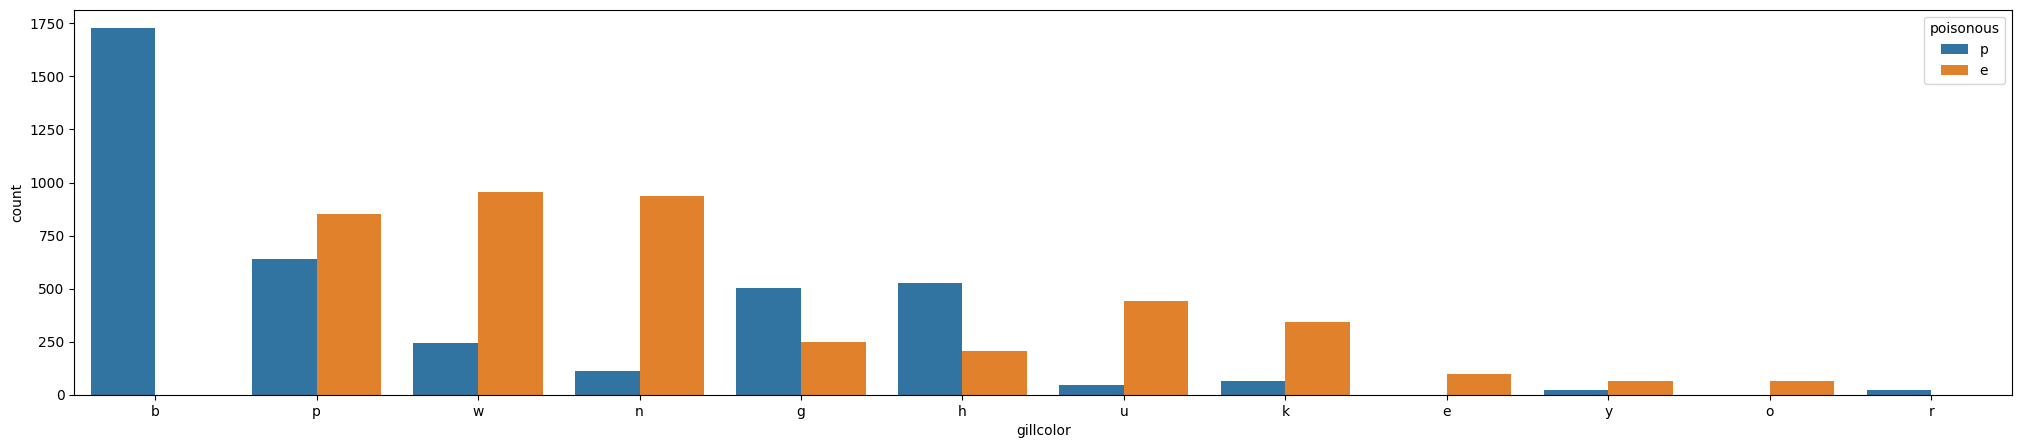

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['gillcolor'],order=dataset['gillcolor'].value_counts().index,hue=dataset['poisonous'])
plt.show()

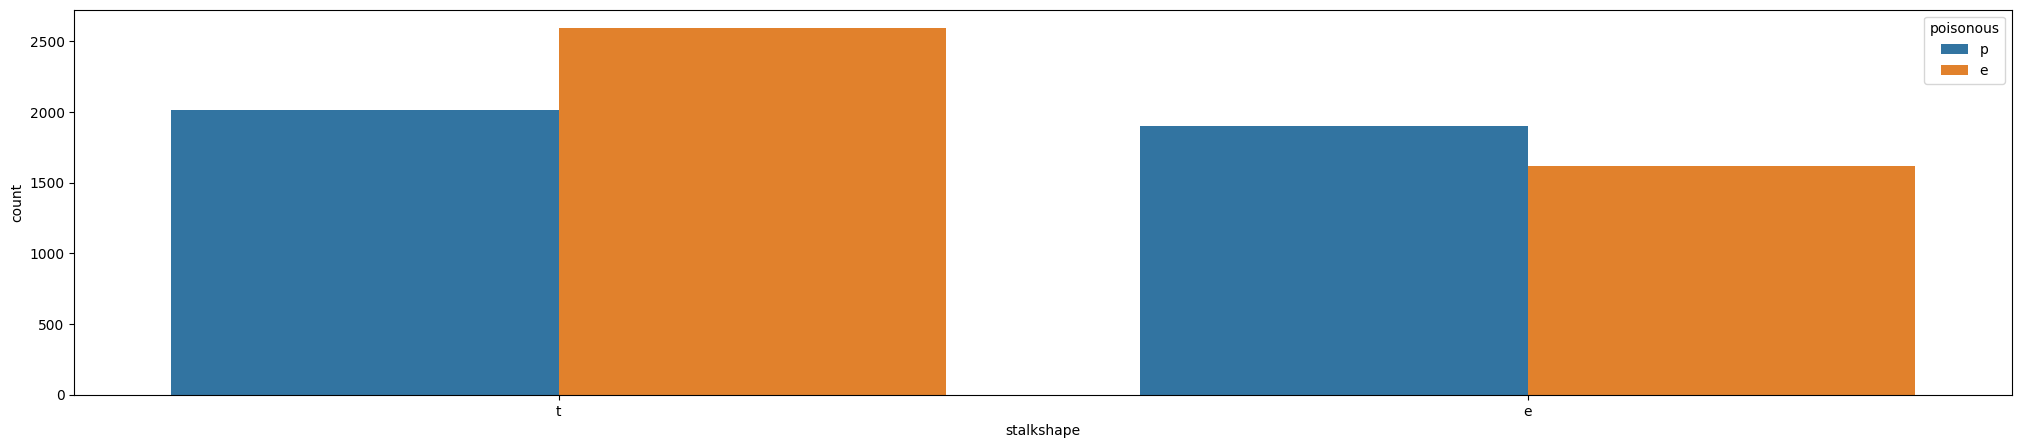

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['stalkshape'],order=dataset['stalkshape'].value_counts().index,hue=dataset['poisonous'])
plt.show()

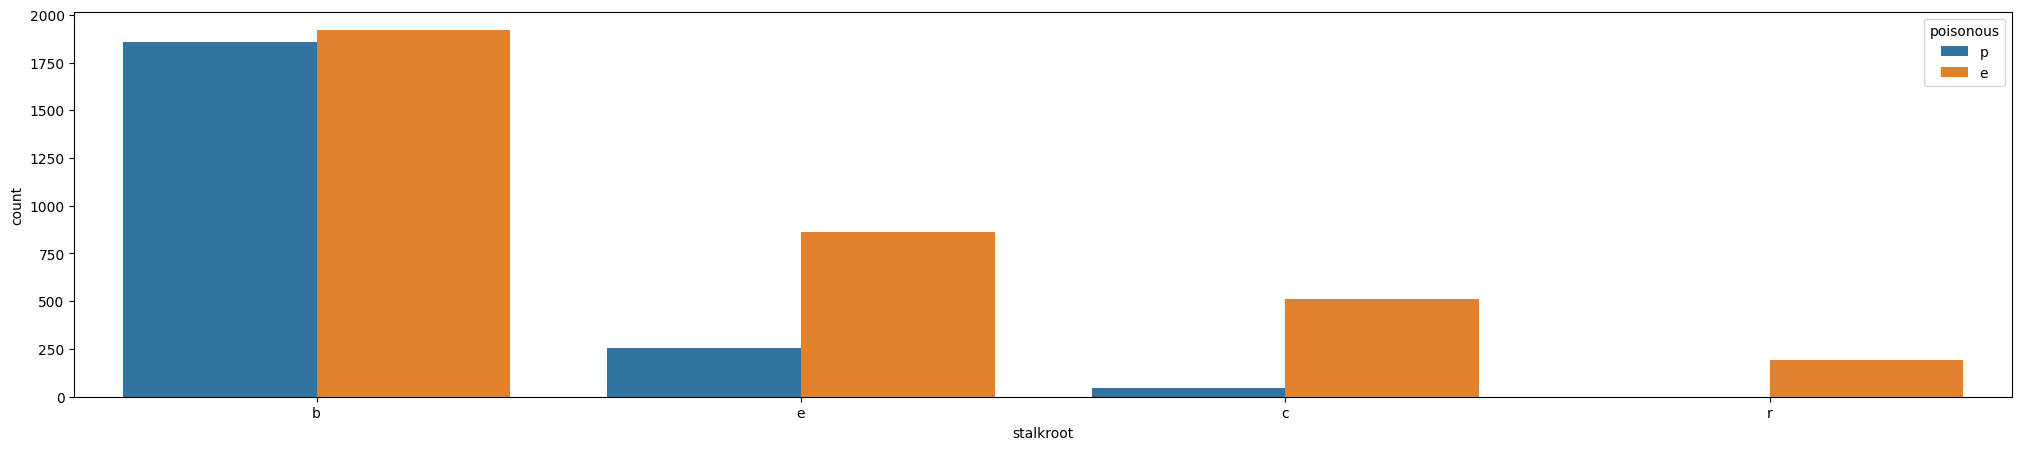

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['stalkroot'],order=dataset['stalkroot'].value_counts().index,hue=dataset['poisonous'])
plt.show()

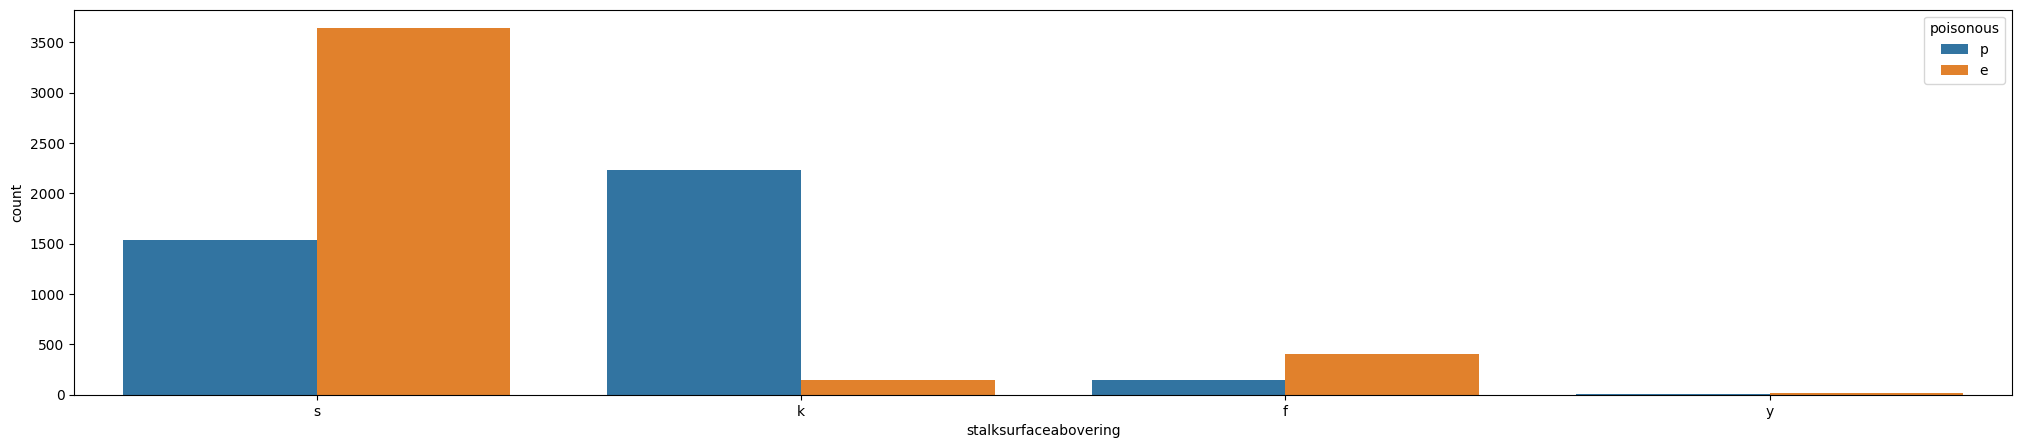

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['stalksurfaceabovering'],order=dataset['stalksurfaceabovering'].value_counts().index,hue=dataset['poisonous'])
plt.show()

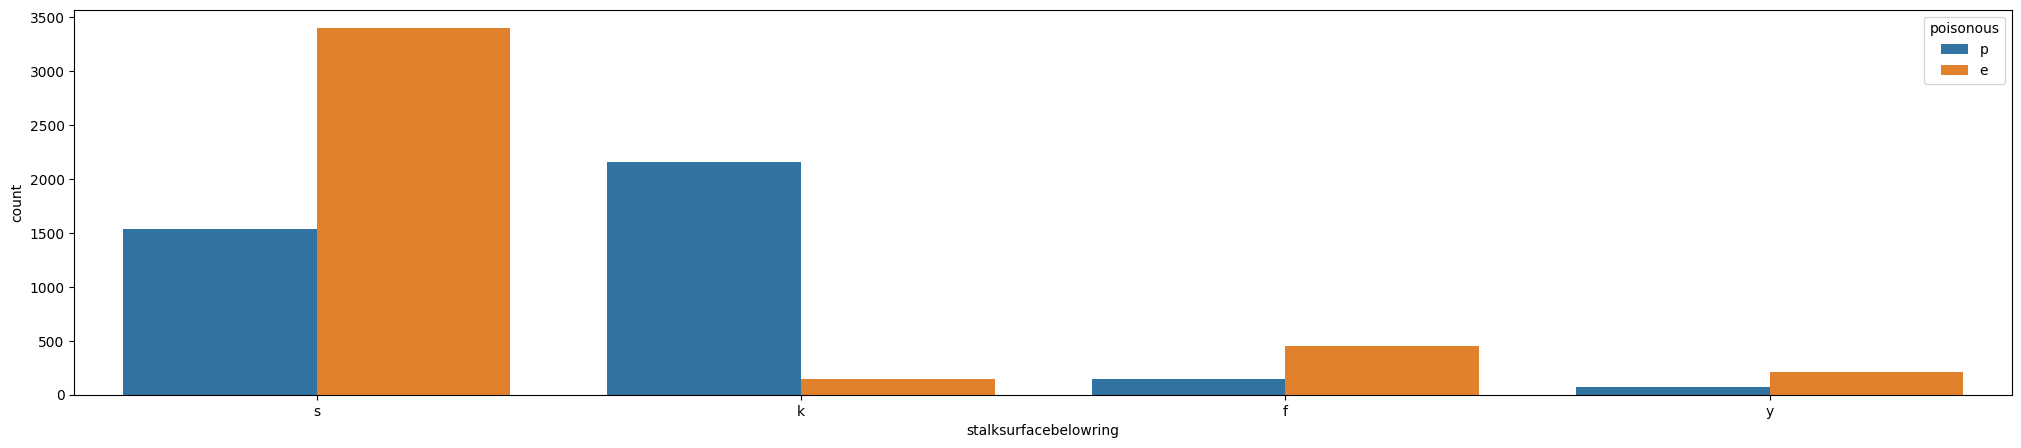

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['stalksurfacebelowring'],order=dataset['stalksurfacebelowring'].value_counts().index,hue=dataset['poisonous'])
plt.show()

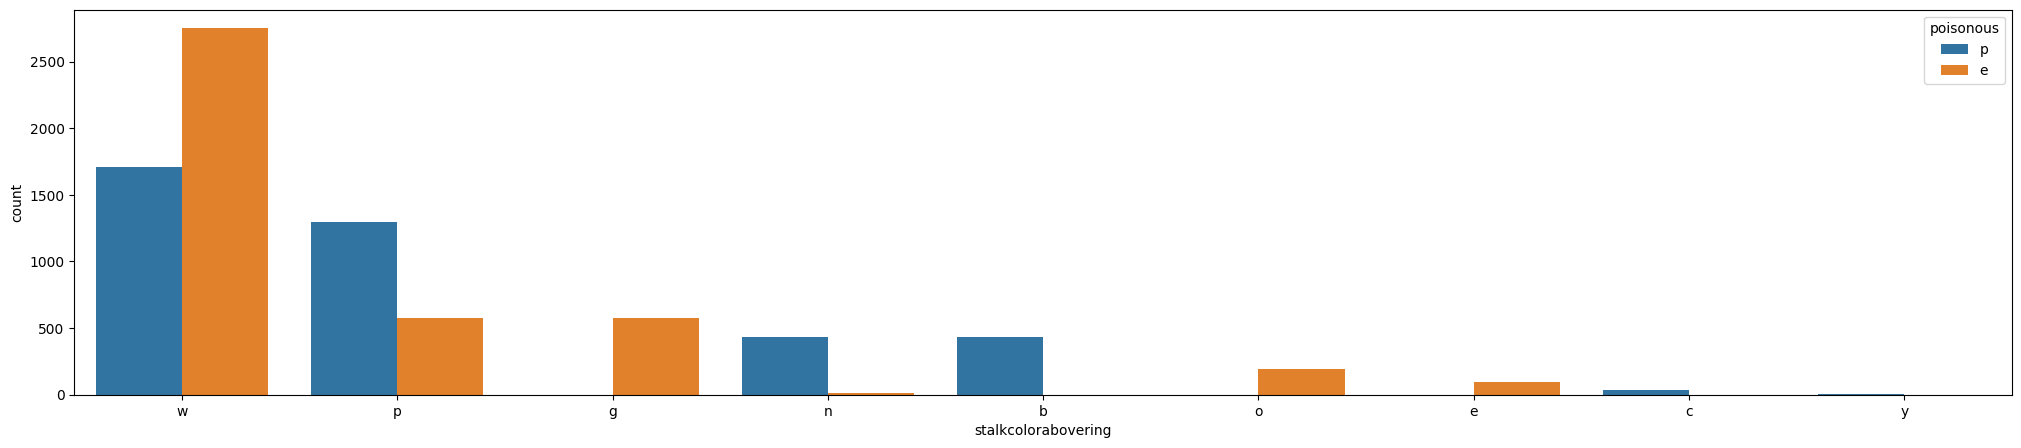

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['stalkcolorabovering'],order=dataset['stalkcolorabovering'].value_counts().index,hue=dataset['poisonous'])
plt.show()

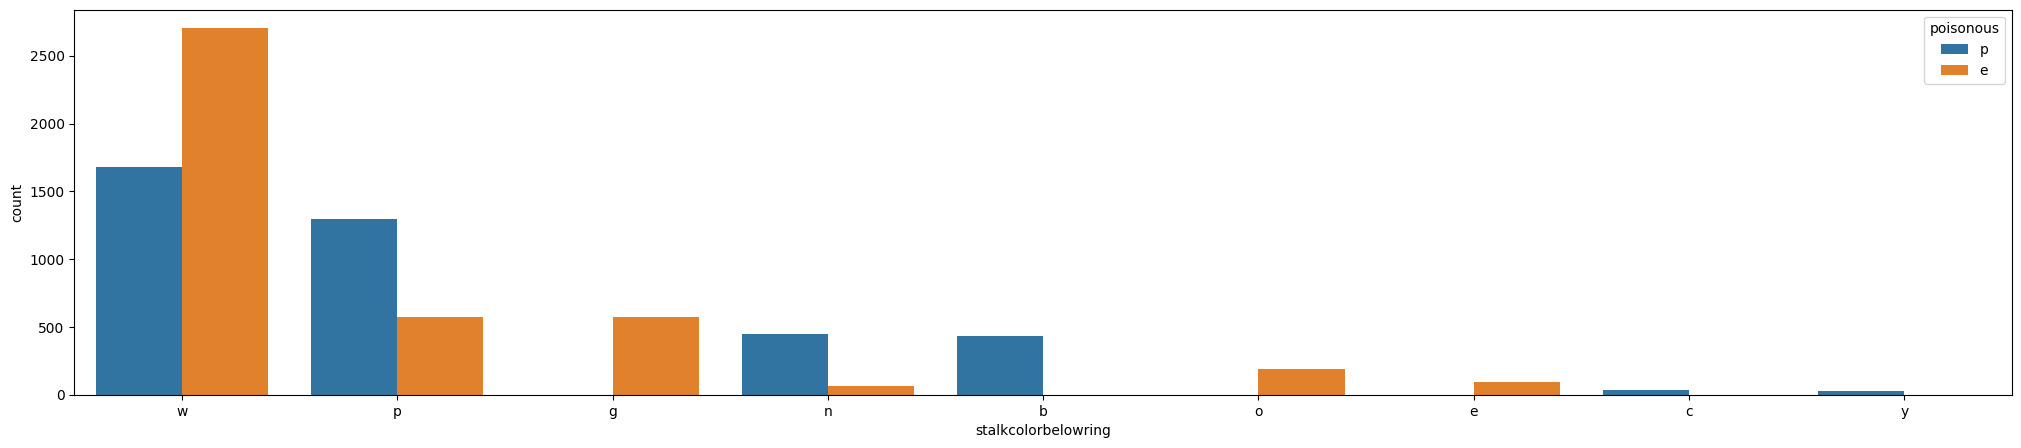

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['stalkcolorbelowring'],order=dataset['stalkcolorbelowring'].value_counts().index,hue=dataset['poisonous'])
plt.show()

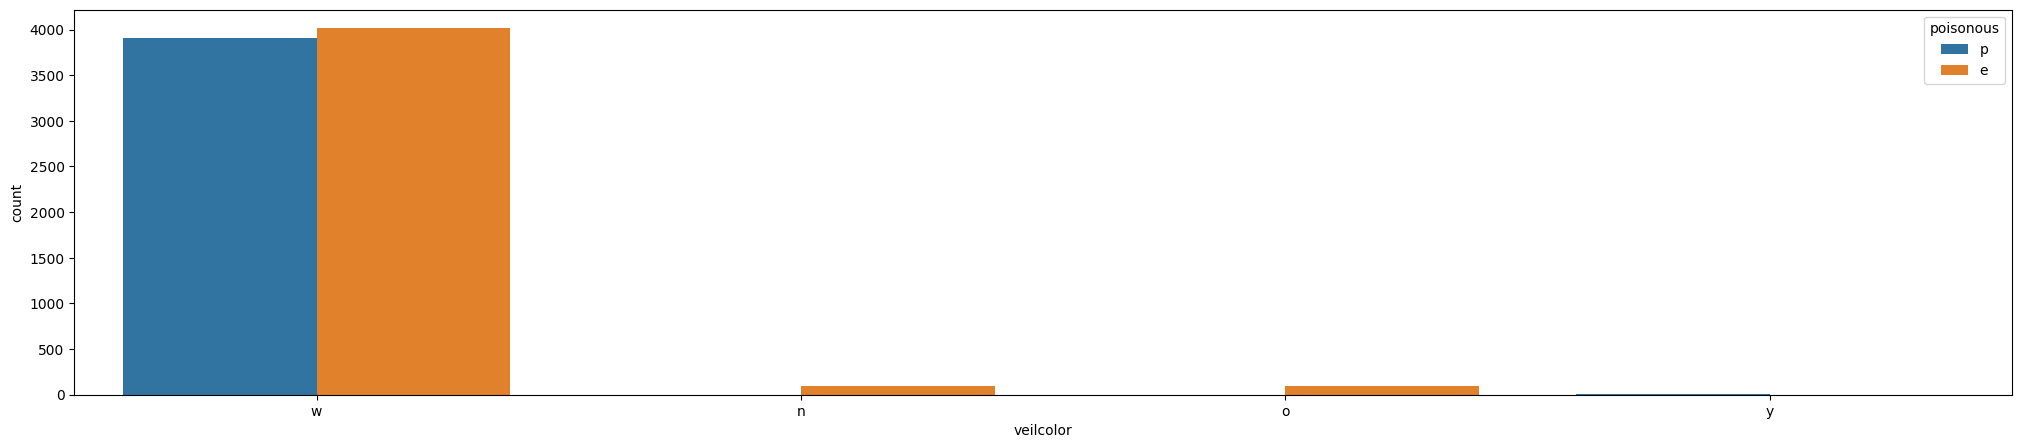

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['veilcolor'],order=dataset['veilcolor'].value_counts().index,hue=dataset['poisonous'])
plt.show()

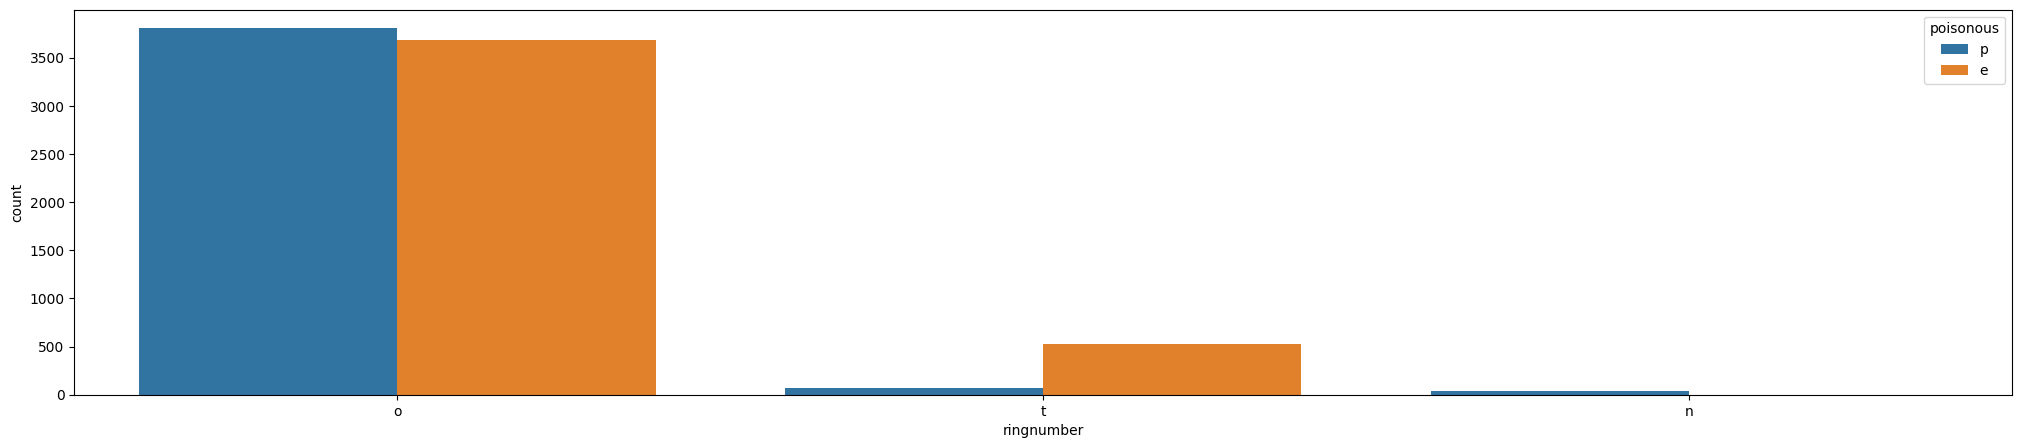

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['ringnumber'],order=dataset['ringnumber'].value_counts().index,hue=dataset['poisonous'])
plt.show()

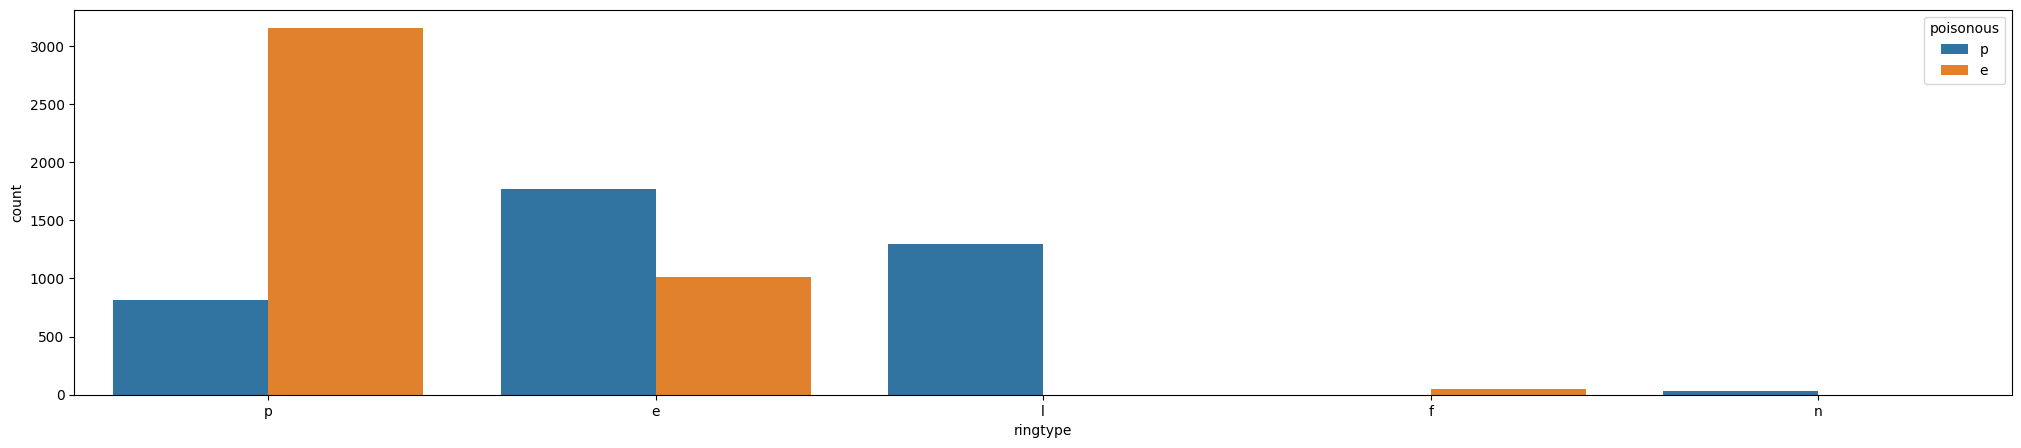

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['ringtype'],order=dataset['ringtype'].value_counts().index,hue=dataset['poisonous'])
plt.show()

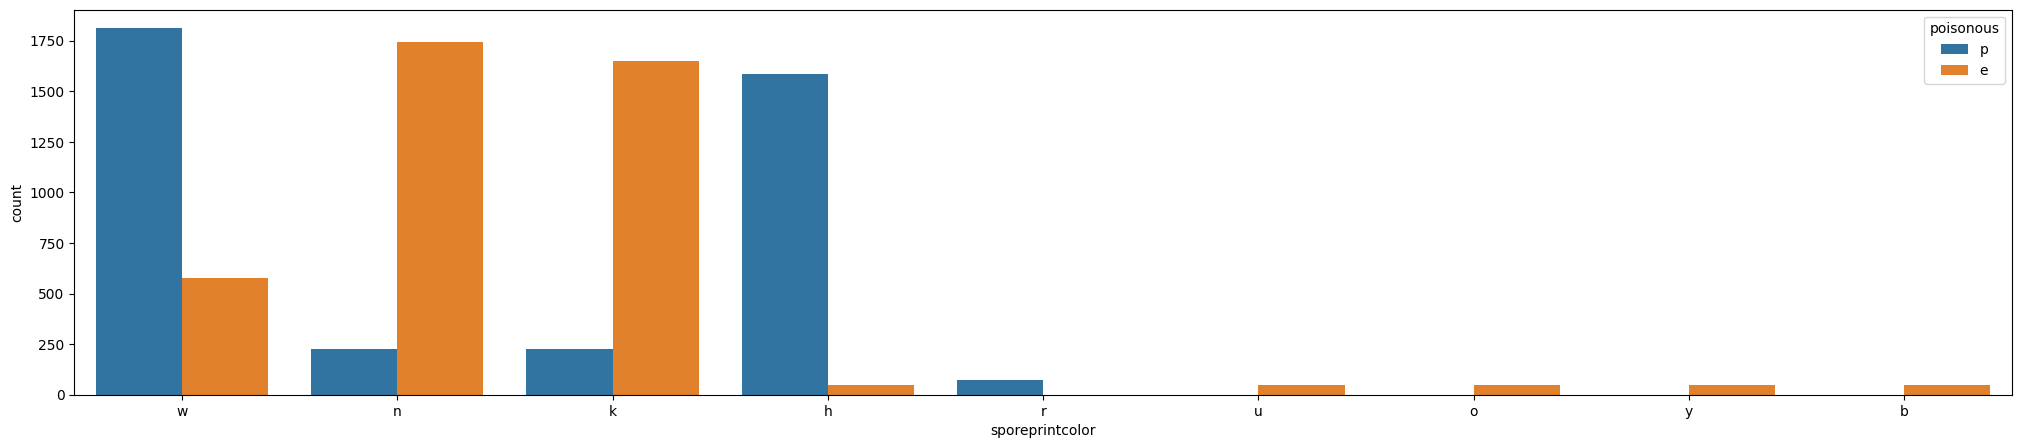

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['sporeprintcolor'],order=dataset['sporeprintcolor'].value_counts().index,hue=dataset['poisonous'])
plt.show()

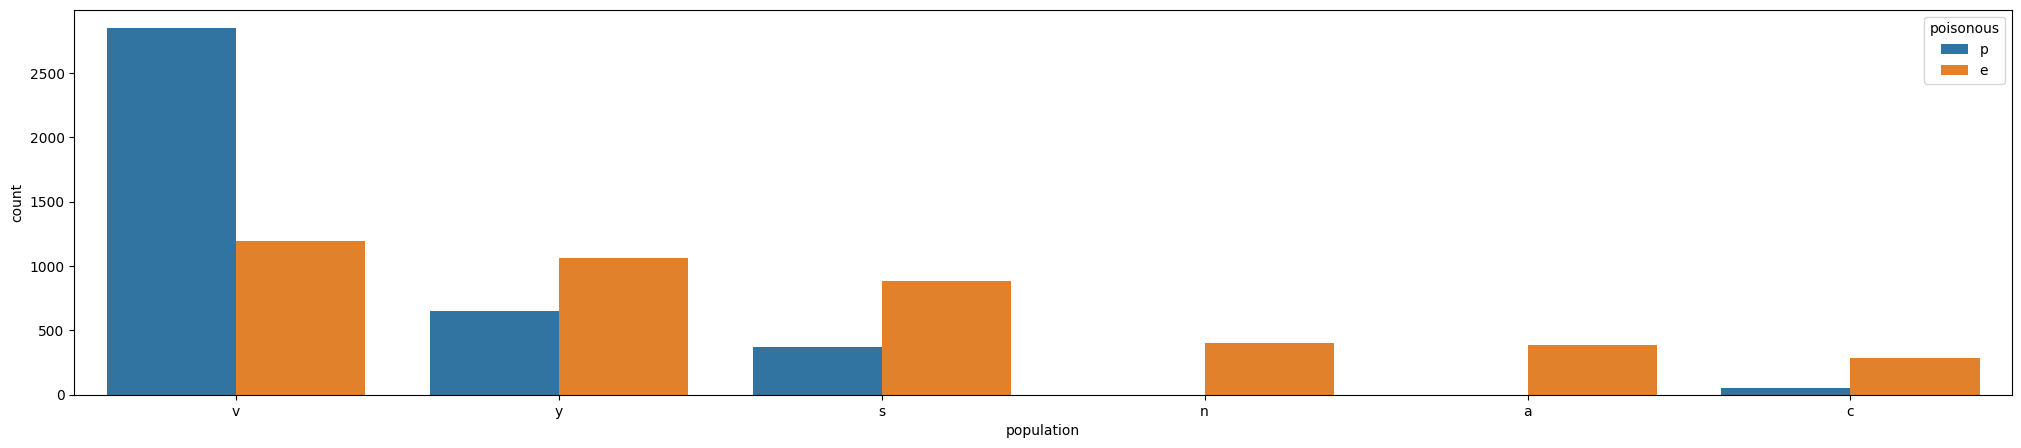

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['population'],order=dataset['population'].value_counts().index,hue=dataset['poisonous'])
plt.show()

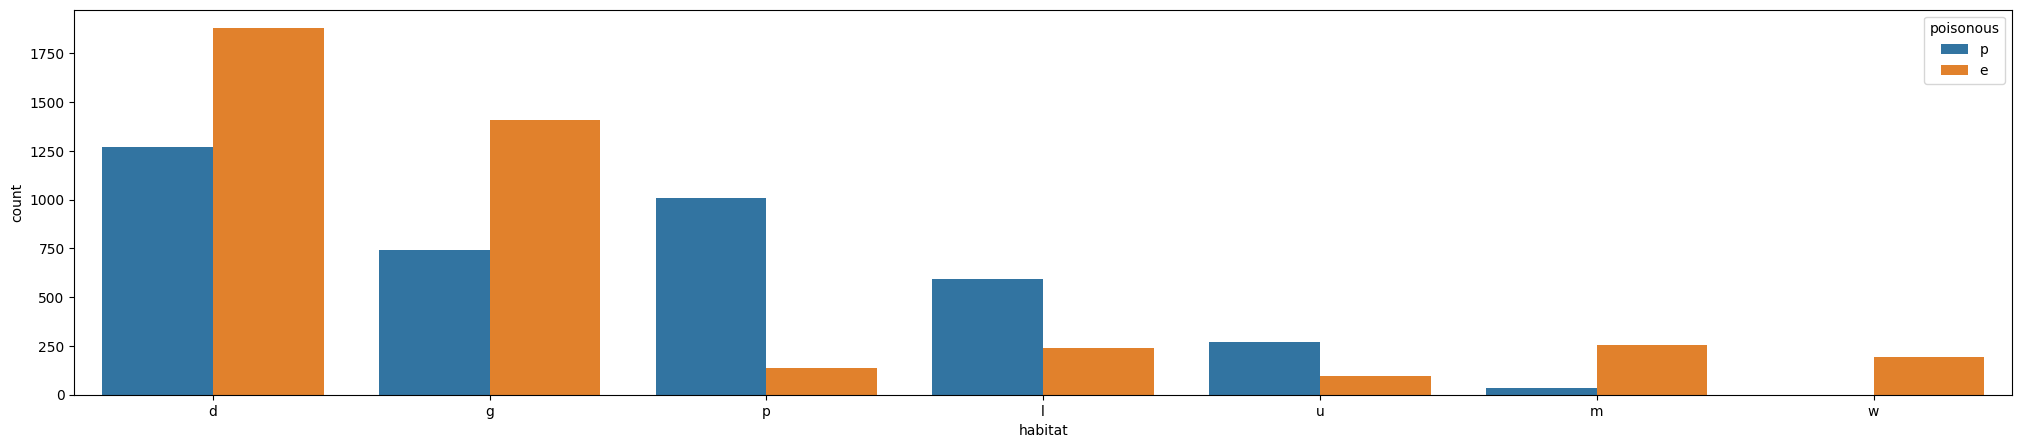

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['habitat'],order=dataset['habitat'].value_counts().index,hue=dataset['poisonous'])
plt.show()

## konversi nilai

In [ ]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")

poisonous : ['p' 'e']
capshape : ['x' 'b' 's' 'f' 'k' 'c']
capsurface : ['s' 'y' 'f' 'g']
capcolor : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gillattachment : ['f' 'a']
gillspacing : ['c' 'w']
gillsize : ['n' 'b']
gillcolor : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalkshape : ['e' 't']
stalkroot : ['e' 'c' 'b' 'r' nan]
stalksurfaceabovering : ['s' 'f' 'k' 'y']
stalksurfacebelowring : ['s' 'f' 'y' 'k']
stalkcolorabovering : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalkcolorbelowring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veilcolor : ['w' 'n' 'o' 'y']
ringnumber : ['o' 't' 'n']
ringtype : ['p' 'e' 'l' 'f' 'n']
sporeprintcolor : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [ ]:
poisonous = {'p':1, 'e':0}
dataset['poisonous'] = dataset['poisonous'].map(poisonous)

capshape = {'x':1, 'b':2, 's':3, 'f':4, 'k':5, 'c':6}
dataset['capshape'] = dataset['capshape'].map(capshape)

capsurface = {'s':1, 'y':2, 'f':3, 'g':4}
dataset['capsurface'] = dataset['capsurface'].map(capsurface)

capcolor = {'n':1, 'y':2, 'w':3, 'g':4, 'e':5, 'p':6, 'b':7, 'u':8, 'c':9, 'r':10}
dataset['capcolor'] = dataset['capcolor'].map(capcolor)

bruises = {'t':1, 'f':0}
dataset['bruises'] = dataset['bruises'].map(bruises)

odor = {'p':1, 'a':2, 'l':3, 'n':4, 'f':5, 'c':6, 'y':7, 's':8, 'm':9}
dataset['odor'] = dataset['odor'].map(odor)

gillattachment = {'f':1, 'a':0}
dataset['gillattachment'] = dataset['gillattachment'].map(gillattachment)

gillspacing = {'c':1, 'w':0}
dataset['gillspacing'] = dataset['gillspacing'].map(gillspacing)

gillsize = {'n':1, 'b':0}
dataset['gillsize'] = dataset['gillsize'].map(gillsize)

gillcolor = {'k':1, 'n':2, 'g':3, 'p':4, 'w':5, 'h':6, 'u':7, 'e':8, 'b':9, 'r':10, 'y':11, 'o':12}
dataset['gillcolor'] = dataset['gillcolor'].map(gillcolor)

stalkshape = {'e':1, 't':0}
dataset['stalkshape'] = dataset['stalkshape'].map(stalkshape)

stalkroot = {'e':1, 'c':2, 'b':3, 'r':4}
dataset['stalkroot'] = dataset['stalkroot'].map(poisonous)

stalksurfaceabovering = {'s':1, 'f':2, 'k':3, 'y':4}
dataset['stalksurfaceabovering'] = dataset['stalksurfaceabovering'].map(stalksurfaceabovering)

stalksurfacebelowring = {'s':1, 'f':2, 'y':4, 'k':3}
dataset['stalksurfacebelowring'] = dataset['stalksurfacebelowring'].map(stalksurfacebelowring)

stalkcolorabovering = {'w':1, 'g':2, 'p':3, 'n':4, 'b':5, 'e':6, 'o':7, 'c':8, 'y':9}
dataset['stalkcolorabovering'] = dataset['stalkcolorabovering'].map(stalkcolorabovering)

stalkcolorbelowring = {'w':1, 'g':2, 'p':3, 'n':4, 'b':5, 'e':6, 'o':7, 'c':8, 'y':9}
dataset['stalkcolorbelowring'] = dataset['stalkcolorbelowring'].map(stalkcolorbelowring)

veilcolor = {'w':1, 'n':2, 'o':3, 'y':4}
dataset['veilcolor'] = dataset['veilcolor'].map(veilcolor)

ringnumber = {'o':1, 't':2, 'n':3}
dataset['ringnumber'] = dataset['ringnumber'].map(ringnumber)

ringtype = {'p':1, 'e':2, 'l':3, 'f':4, 'n':5}
dataset['ringtype'] = dataset['ringtype'].map(ringtype)

sporeprintcolor = {'k':1, 'n':2, 'u':3, 'h':4, 'w':5, 'r':6, 'o':7, 'y':8, 'b':9}
dataset['sporeprintcolor'] = dataset['sporeprintcolor'].map(sporeprintcolor)

population = {'s':1, 'n':2, 'a':3, 'v':4, 'y':5, 'c':6}
dataset['population'] = dataset['population'].map(population)

habitat = {'u':1, 'g':2, 'm':3, 'd':4, 'p':5, 'w':6, 'l':7}
dataset['habitat'] = dataset['habitat'].map(habitat)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   poisonous              8124 non-null   int64  
 1   capshape               8124 non-null   int64  
 2   capsurface             8124 non-null   int64  
 3   capcolor               8124 non-null   int64  
 4   bruises                8124 non-null   int64  
 5   odor                   8124 non-null   int64  
 6   gillattachment         8124 non-null   int64  
 7   gillspacing            8124 non-null   int64  
 8   gillsize               8124 non-null   int64  
 9   gillcolor              8124 non-null   int64  
 10  stalkshape             8124 non-null   int64  
 11  stalkroot              1120 non-null   float64
 12  stalksurfaceabovering  8124 non-null   int64  
 13  stalksurfacebelowring  8124 non-null   int64  
 14  stalkcolorabovering    8124 non-null   int64  
 15  stal

In [ ]:
dataset.head()

,poisonous,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurfaceabovering,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,1,1,1,1,1,1,1,1,1,1,1,0.0,1,1,1,1,1,1,1,1,1,1
1,0,1,1,2,1,2,1,1,0,1,1,NaN,1,1,1,1,1,1,1,2,2,2
2,0,2,1,3,1,3,1,1,0,2,1,NaN,1,1,1,1,1,1,1,2,2,3
3,1,1,2,3,1,1,1,1,1,2,1,0.0,1,1,1,1,1,1,1,1,1,1
4,0,1,1,4,0,4,1,0,0,1,0,0.0,1,1,1,1,1,1,2,2,3,2


In [ ]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['stalkroot'], dtype='object')

In [ ]:
median_value=dataset['stalkroot'].median()
dataset['stalkroot']=dataset['stalkroot'].fillna(median_value)

# tambahkan jika kurang

In [ ]:
dataset.loc[:, dataset.isnull().any()].columns

Index([], dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   poisonous              8124 non-null   int64  
 1   capshape               8124 non-null   int64  
 2   capsurface             8124 non-null   int64  
 3   capcolor               8124 non-null   int64  
 4   bruises                8124 non-null   int64  
 5   odor                   8124 non-null   int64  
 6   gillattachment         8124 non-null   int64  
 7   gillspacing            8124 non-null   int64  
 8   gillsize               8124 non-null   int64  
 9   gillcolor              8124 non-null   int64  
 10  stalkshape             8124 non-null   int64  
 11  stalkroot              8124 non-null   float64
 12  stalksurfaceabovering  8124 non-null   int64  
 13  stalksurfacebelowring  8124 non-null   int64  
 14  stalkcolorabovering    8124 non-null   int64  
 15  stal

In [ ]:
# dataset['nama_kolom'] = dataset['nama_kolom'].astype(str).astype(float)
# tambahkan jika kurang

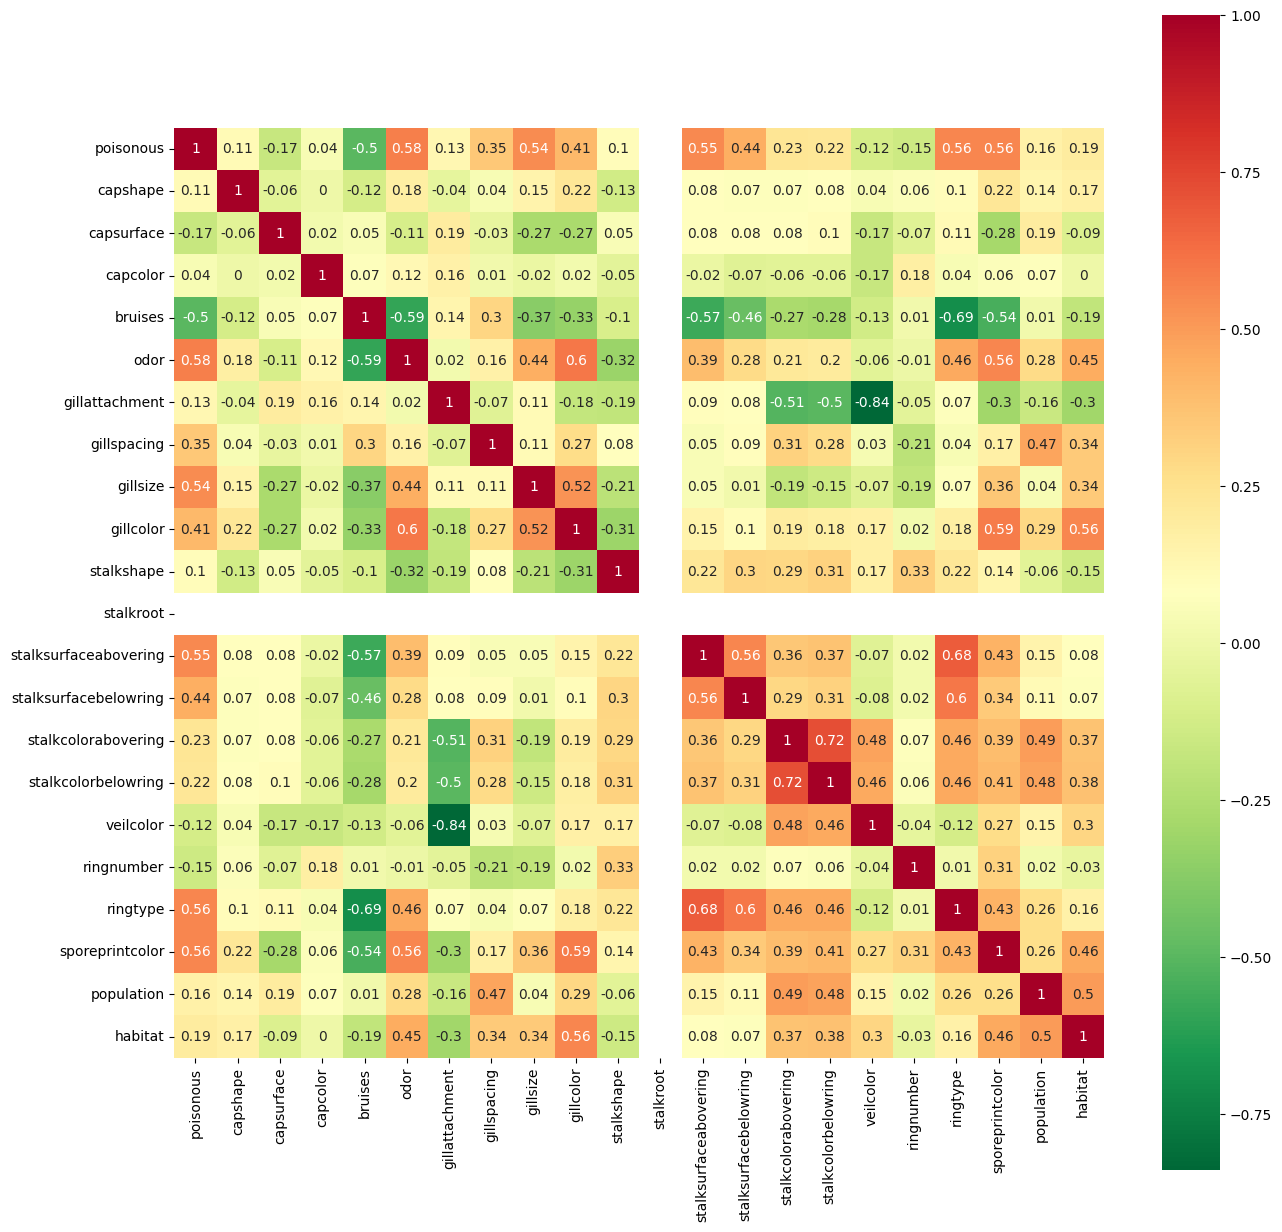

In [ ]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [ ]:
dataset.head()

,poisonous,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurfaceabovering,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,1,1,1,1,1,1,1,1,1,1,1,0.0,1,1,1,1,1,1,1,1,1,1
1,0,1,1,2,1,2,1,1,0,1,1,0.0,1,1,1,1,1,1,1,2,2,2
2,0,2,1,3,1,3,1,1,0,2,1,0.0,1,1,1,1,1,1,1,2,2,3
3,1,1,2,3,1,1,1,1,1,2,1,0.0,1,1,1,1,1,1,1,1,1,1
4,0,1,1,4,0,4,1,0,0,1,0,0.0,1,1,1,1,1,1,2,2,3,2


In [ ]:
X = dataset.drop(columns=['poisonous'])

In [ ]:
X

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurfaceabovering,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,1,1,1,1,1,1,1,1,1,1,0.0,1,1,1,1,1,1,1,1,1,1
1,1,1,2,1,2,1,1,0,1,1,0.0,1,1,1,1,1,1,1,2,2,2
2,2,1,3,1,3,1,1,0,2,1,0.0,1,1,1,1,1,1,1,2,2,3
3,1,2,3,1,1,1,1,1,2,1,0.0,1,1,1,1,1,1,1,1,1,1
4,1,1,4,0,4,1,0,0,1,0,0.0,1,1,1,1,1,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,1,1,0,4,0,1,0,11,1,0.0,1,1,7,7,3,1,1,9,6,7
8120,1,1,1,0,4,0,1,0,11,1,0.0,1,1,7,7,2,1,1,9,4,7
8121,4,1,1,0,4,0,1,0,2,1,0.0,1,1,7,7,3,1,1,9,6,7
8122,5,2,1,0,7,1,1,1,9,0,0.0,1,3,1,1,1,1,2,5,4,7


In [ ]:
Y = dataset['poisonous']

In [ ]:
Y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: poisonous, Length: 8124, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [ ]:
X_train

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurfaceabovering,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
4750,4,3,2,0,5,1,1,0,3,1,0.0,3,3,3,5,1,1,3,4,4,4
3026,1,3,6,0,6,1,0,1,7,1,0.0,1,1,1,1,1,1,1,1,1,4
3757,4,3,5,1,4,1,1,0,2,0,0.0,1,1,2,2,1,1,1,1,4,4
6167,4,1,5,0,7,1,1,1,9,0,0.0,1,3,3,1,1,1,2,5,4,5
6281,1,1,5,0,7,1,1,1,9,0,0.0,1,1,3,1,1,1,2,5,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,1,2,1,0,5,1,1,1,9,0,0.0,3,1,3,1,1,1,2,5,4,5
5390,5,2,5,1,4,1,1,0,5,1,0.0,1,1,1,6,1,2,2,5,6,6
860,4,2,1,1,3,1,1,0,5,1,0.0,1,4,1,1,1,1,1,2,5,5
7603,5,1,5,0,5,1,1,1,9,0,0.0,1,1,3,3,1,1,2,5,4,5


In [ ]:
nilai1 = np.arange(2,11)
print('nilai1 = ', nilai1)
print()
nilai2 = np.arange(0,101,10)
print('nilai2 = ', nilai2)

nilai1 =  [ 2  3  4  5  6  7  8  9 10]

nilai2 =  [  0  10  20  30  40  50  60  70  80  90 100]


In [ ]:
# untuk decision tree
parameters_dt = {
                "model__max_depth": np.arange(1,10),
                "model__min_samples_leaf": np.arange(1,10),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [ ]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier()),
                          ])

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=4,
                                        random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 7
model__min_samples_leaf: 4
model__min_samples_split: 2
model__random_state: 42


In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.9994528792230885
Precision pada training set:  0.9994528792230885
Recall pada training set:  0.9994528792230885
Akurasi pada test set:  1.0
Precision pada test set:  1.0
Recall pada test set:  1.0


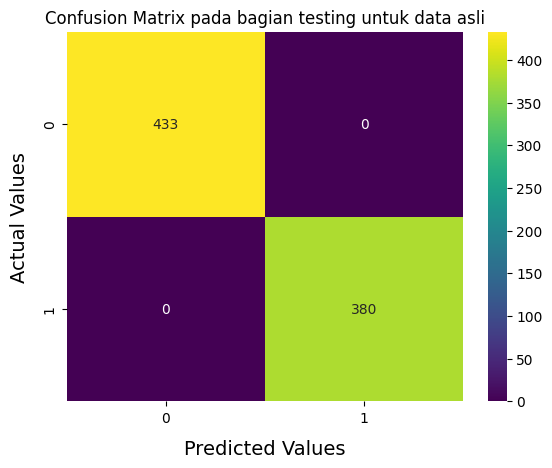

In [ ]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()